In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
plt.plot()

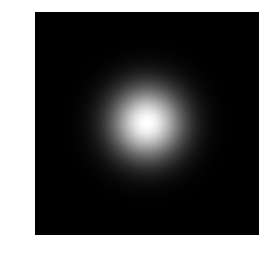

In [38]:
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y))/100)
    return g / g.sum()
 
# Make the Gaussian by calling the function
gaussian_kernel_array = gaussian_kernel(1001)


plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('gray'), interpolation='nearest')
plt.axis('off')
plt.savefig("data/2d_gaussian.png", dpi=400)
plt.show()

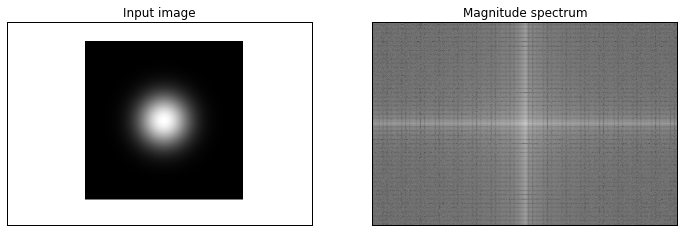

In [39]:
import cv2

img = cv2.imread('data/2d_gaussian.png', 0)
f = numpy.fft.fft2(img)
fshift = numpy.fft.fftshift(f)
magnitude_spectrum = 20*numpy.log(numpy.abs(fshift))

plt.figure(figsize=(12,12))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude spectrum'), plt.xticks([]), plt.yticks([])
plt.show()